<a href="https://colab.research.google.com/github/hiagomereles/MVP-Analise-de-Dados-e-Boas-Praticas/blob/main/MVP_Hiago__An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

## Aluno Hiago Mereles Faustino

### Indices de Pobreza no Brasil

## 1. Definição do Problema

O dataset utilizado neste MVP será o **Indices de Pobreza no Brasil**. O dataset é proveniente do site: https://economiapopular.com.br e o dataset foi baixado pelo Kaggle: https://www.kaggle.com/datasets/fidelissauro/indices-pobreza-brasil. Este dataset é populado com informações sobre o levantamento de pessoas e famílias no Brasil em situações de Pobreza, Extrema Pobreza e Vulnerabilidade no Brasil, usando como fonte de dados o Cadastro Único e Auxílio Brasil.

**Informações sobre os atributos:**

1. referencia - Ano de Referencia do Dado Coletado
2. periodo - Periodo de referencia do Dado Coletado - posso tirar futuramente
3. pobreza - Número de Pessoas em Situação de Pobreza
4. ext_pobreza - Numero de Pessoas em situação de Extrema Pobreza
5. total - Número Total de Pessoas em Situação de Vulnerabilidade
6. pop_estimada - Estimativa Populacional do Período
7. por_pobreza - Porcentagem Correspondente da População em Situação de Pobreza
8. por_ext_pobreza - Porcentagem Correspondente da População em Situação de Extrema Pobreza
9. por_vulnerabilidade - Porcentagem Correspondente da População em Situação de Vulnerabilidade
10. familias_pobreza - Numero de Famílias em Situalçao de Pobreza
11. familias_ext_pobreza - Numero de Famílias em Situalçao de Extrema Pobreza
12. familias_vulnerabilidade - Numero de Famílias em situação de vulnerabilidade


In [37]:
#Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Utilizaremos o pacote Pandas (Phyton Data Analysis Library) para carregar um arquivo.csv com cabeçalho disponível online. Mas iremos alterar o cabeçalho para melhorar a visualização dos dados.
Com o dataset carregado, iremos explorá-lo um pouco.

In [39]:
# Carrega o arquivo csv usando Pandas e a URL desejada

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/hiagomereles/MVP-Analise-de-Dados-e-Boas-Praticas/main/indices_pobreza_consolidado.csv"

# Excluindo colunas do dataset que não seram utilizadas na análise dos dados.
colunas_para_excluir = [12,13,14,15,16,17,18,19,20]

# Carrega o dataset
dataset = pd.read_csv(url)

# Exclui as colunas que não utilizaremos nesta análise
dataset = dataset.drop(dataset.columns[colunas_para_excluir], axis=1)

# Novos nomes para as colunas restantes
novos_nomes_colunas = ['referencia','periodo','pobreza','ext_pobreza','total','pop_estimada','por_pobreza','por_ext_pobreza',
           'por_vulnerabilidade','familias_pobreza', 'familias_ext_pobreza','familias_vulnerabilidade']

# Atribui os novos nomes de colunas
dataset.columns = novos_nomes_colunas

In [40]:
dataset.head()

,referencia,periodo,pobreza,ext_pobreza,total,pop_estimada,por_pobreza,por_ext_pobreza,por_vulnerabilidade,familias_pobreza,familias_ext_pobreza,familias_vulnerabilidade
0,08/2012,201208,19370363,44381455,63751818,193976530,0.100,0.230,0.330,5265743,12897221,18162964
1,09/2012,201209,19371279,44554715,63925994,193976530,0.100,0.230,0.330,5278170,13006755,18284925
2,10/2012,201210,19376665,44652093,64028758,193976530,0.100,0.230,0.330,5288902,13076366,18365268
3,11/2012,201211,19381040,44723215,64104255,193976530,0.100,0.230,0.330,5298295,13131359,18429654
4,12/2012,201212,19392882,44684759,64077641,193976530,0.100,0.230,0.330,5311337,13161099,18472436


##3. Análise de Dados

###3.1. Estatísticas Descritivas

Vamos Iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [41]:
# Mostra as dimensões do dataset
print(dataset.shape)

(122, 12)


In [42]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   referencia                122 non-null    object 
 1   periodo                   122 non-null    int64  
 2   pobreza                   122 non-null    int64  
 3   ext_pobreza               122 non-null    int64  
 4   total                     122 non-null    int64  
 5   pop_estimada              122 non-null    int64  
 6   por_pobreza               122 non-null    float64
 7   por_ext_pobreza           122 non-null    float64
 8   por_vulnerabilidade       122 non-null    float64
 9   familias_pobreza          122 non-null    int64  
 10  familias_ext_pobreza      122 non-null    int64  
 11  familias_vulnerabilidade  122 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 11.6+ KB
None


Acima vimos os timos de dados que estão em cada coluna do dataset, quantas linhas cada coluna tem e se existe algum null. No caso não temos nenhum nulo e temos uma coluna chamada "referencia" em que o Dtype é o Object, futuramente iremos realizar uma alteração para que o Dtype seja X e possamos utilizar essa coluna como uma coluna de data

In [43]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,referencia,periodo,pobreza,ext_pobreza,total,pop_estimada,por_pobreza,por_ext_pobreza,por_vulnerabilidade,familias_pobreza,familias_ext_pobreza,familias_vulnerabilidade
0,08/2012,201208,19370363,44381455,63751818,193976530,0.100,0.230,0.330,5265743,12897221,18162964
1,09/2012,201209,19371279,44554715,63925994,193976530,0.100,0.230,0.330,5278170,13006755,18284925
2,10/2012,201210,19376665,44652093,64028758,193976530,0.100,0.230,0.330,5288902,13076366,18365268
3,11/2012,201211,19381040,44723215,64104255,193976530,0.100,0.230,0.330,5298295,13131359,18429654
4,12/2012,201212,19392882,44684759,64077641,193976530,0.100,0.230,0.330,5311337,13161099,18472436
5,01/2013,201301,19393635,44686942,64080577,201062789,0.100,0.220,0.320,5315757,13175545,18491302
6,02/2013,201302,19392895,44705760,64098655,201062789,0.100,0.220,0.320,5322337,13205720,18528057
7,03/2013,201303,19294383,44583031,63877414,201062789,0.100,0.220,0.320,5302410,13212397,18514807
8,04/2013,201304,19293243,44501519,63794762,201062789,0.100,0.220,0.320,5325286,13265523,18590809
9,05/2013,201305,19307126,44474370,63781496,201062789,0.100,0.220,0.320,5336162,13282331,18618493


In [44]:
# Mostra as 10 ultimas linhas do dataset
dataset.tail(10)

,referencia,periodo,pobreza,ext_pobreza,total,pop_estimada,por_pobreza,por_ext_pobreza,por_vulnerabilidade,familias_pobreza,familias_ext_pobreza,familias_vulnerabilidade
112,12/2021,202112,8901321,42662245,51563566,213317639,0.040,0.200,0.240,3124874,15693270,18818144
113,01/2022,202201,8454642,45693632,54148274,213317639,0.040,0.210,0.250,2886349,16975529,19861878
114,02/2022,202202,8618183,46445574,55063757,213317639,0.040,0.220,0.260,2982086,17544358,20526444
115,03/2022,202203,8711941,46781067,55493008,213317639,0.040,0.220,0.260,3034968,17820102,20855070
116,04/2022,202204,8882169,47001855,55884024,213317639,0.040,0.220,0.260,3136245,18214051,21350296
117,05/2022,202205,8979446,46998630,55978076,213317639,0.040,0.220,0.260,3200245,18444762,21645007
118,06/2022,202206,9042994,47268983,56311977,213317639,0.040,0.220,0.260,3236172,18764335,22000507
119,07/2022,202207,9173896,47695827,56869723,213317639,0.040,0.220,0.270,3306740,19197806,22504546
120,08/2022,202208,9346851,48369266,57716117,213317639,0.040,0.230,0.270,3404214,19820117,23224331
121,09/2022,202209,9509943,49055941,58565884,213317639,0.040,0.230,0.270,3495077,20439159,23934236


É sempre importante verificar o tipo dos atributos do dataset, pois pode ser necessário realizar conversões. Já fizemos anteriormente com o comando info, mas vamos ver uma outra forma de verificar a natureza de cada atributo e então exibir um resumo estatístico do dataset.

In [45]:
# Verificar o tipo de dataset de cada atributo
dataset.dtypes

referencia                   object
periodo                       int64
pobreza                       int64
ext_pobreza                   int64
total                         int64
pop_estimada                  int64
por_pobreza                 float64
por_ext_pobreza             float64
por_vulnerabilidade         float64
familias_pobreza              int64
familias_ext_pobreza          int64
familias_vulnerabilidade      int64
dtype: object

In [46]:
# Converte a coluna 'referencia' para o tipo de dado de data
dataset['referencia'] = pd.to_datetime(dataset['referencia'])

# Extrai o ano e o mês da coluna 'referencia'
dataset['ano_mes'] = dataset['referencia'].dt.to_period('M')

In [47]:
# Verificar se a alteração do tipo de dado da coluna referência foi bem sucedida
tipo_de_dado_referencia = dataset['referencia'].dtypes

print(f"Tipo de dado da coluna 'referencia': {tipo_de_dado_referencia}")


Tipo de dado da coluna 'referencia': datetime64[ns]


In [48]:
# Definir a opção de formato para exibir números float sem notação científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [49]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,periodo,pobreza,ext_pobreza,total,pop_estimada,por_pobreza,por_ext_pobreza,por_vulnerabilidade,familias_pobreza,familias_ext_pobreza,familias_vulnerabilidade
count,122.000,122.000,122.000,122.000,122.000,122.000,122.000,122.000,122.000,122.000,122.000
mean,201722.926,12948012.131,41231462.549,54179474.680,207211210.762,0.063,0.200,0.262,3865710.615,13630662.049,17496372.664
std,296.502,4046276.465,3015699.307,6015011.201,4830404.929,0.022,0.017,0.035,958263.036,1621377.868,1677817.524
min,201208.000,8454642.000,36803455.000,47229326.000,193976530.000,0.040,0.180,0.220,2746503.000,11720302.000,15569480.000
25%,201502.250,8978067.500,38698620.250,48892009.000,204482867.000,0.040,0.190,0.230,2984406.500,12718069.000,16261198.250
50%,201708.500,12248774.500,39777429.500,52292939.500,207660929.000,0.060,0.190,0.250,3668067.500,13209058.500,16734127.000
75%,202002.750,15451770.250,44200667.500,57708982.000,211755692.000,0.080,0.220,0.280,4435881.250,13960209.000,18586139.250
max,202209.000,19393635.000,49055941.000,64396550.000,213317639.000,0.100,0.230,0.330,5398817.000,20439159.000,23934236.000


### 3.2. Visualizações Unimodais
Vamos criar agora um gráfico de para cada atributo do dataset para visualizarmos se encontramos alguma distribuição padronizada.

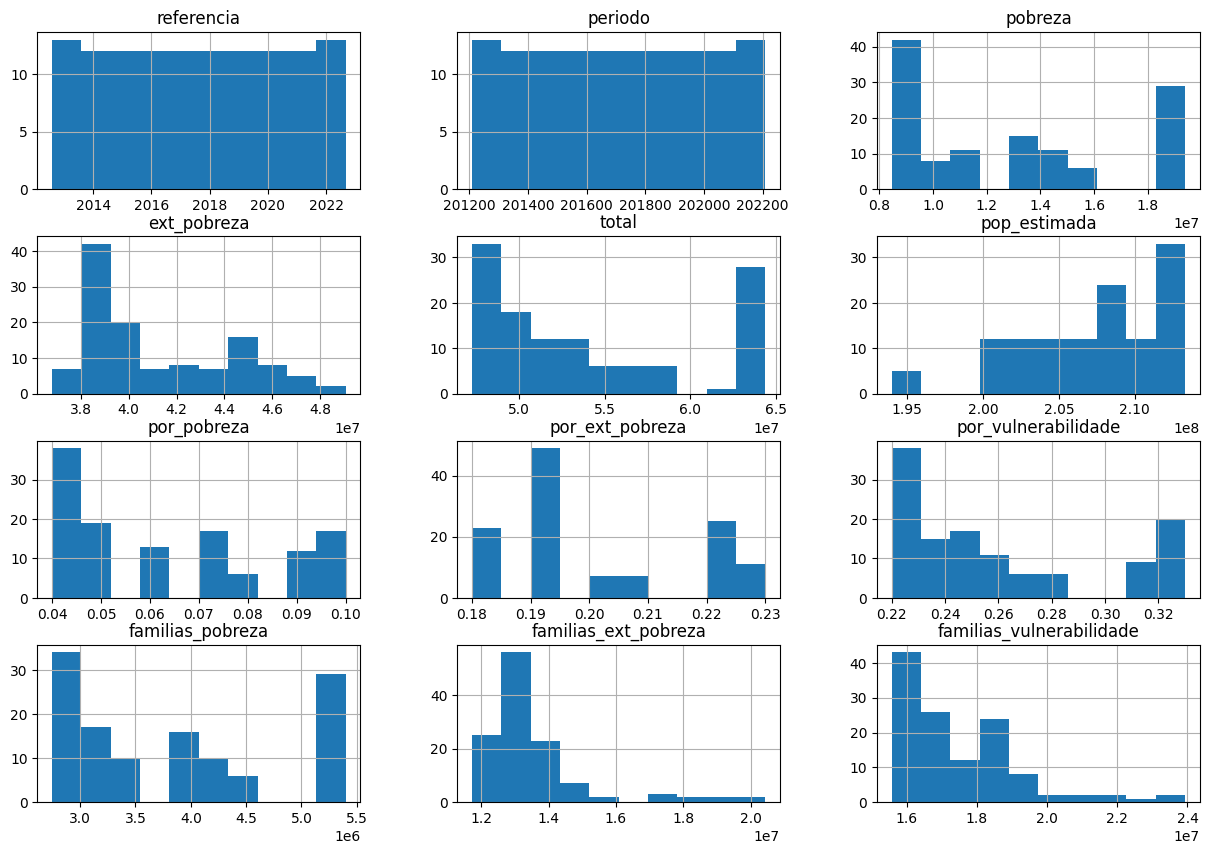

In [50]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo do dataset.

Veremos que muitos dos atributos têm uma distribuição distorcida. Uma transformação como a Box-Cox, que pode aproximar a distribuição de uma Normal, pode ser útil neste caso.

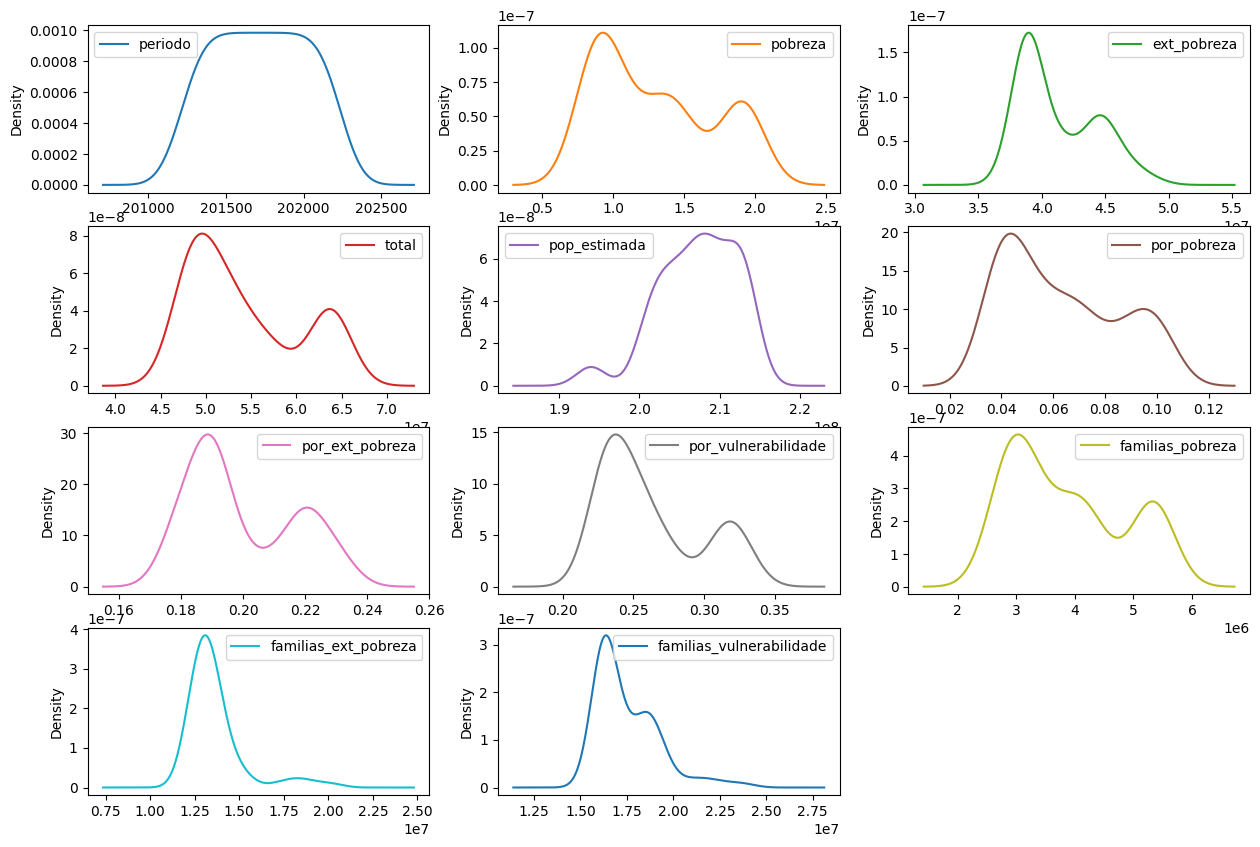

In [51]:
# Remover a coluna 'referencia' do DataFrame para esta análise (porque a coluna 'referencia' é uma coluna do tipo data e erros podem ocorrer ao criar o Density Plot)
dataset_sem_referencia = dataset.drop('referencia', axis=1)

# Gerar o gráfico de densidade(Density Plot) usando as colunas restantes
dataset_sem_referencia.plot(kind='density', subplots=True, layout=(4, 3), sharex=False, figsize=(15, 10))
plt.show()

Vamos agora trabalhar com boxplots. No **boxblot**, a linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

*OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.*

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.

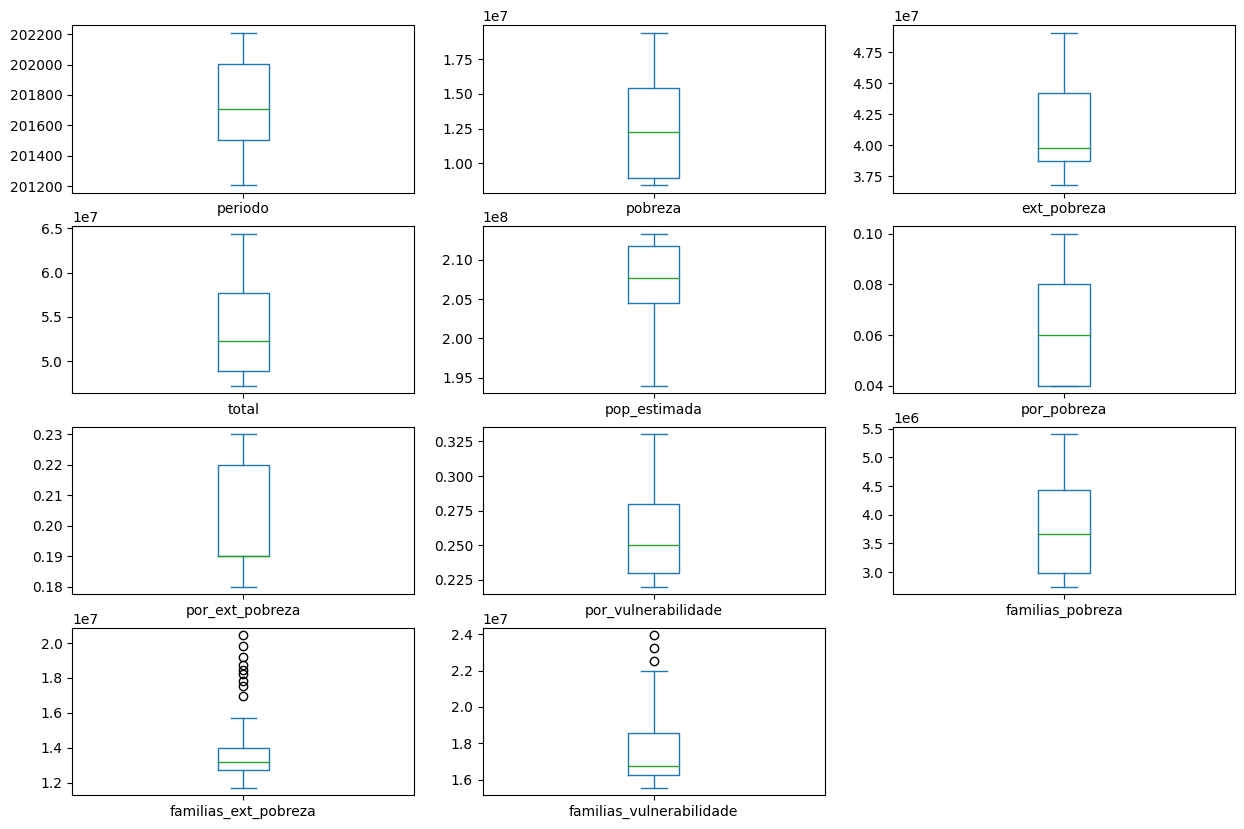

In [52]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Vemos acima que temos uma quantidade considerável de outliers na coluna de 'familias_ext_pobreza' e também alguns outliers na coluna das 'familias_vulnerabilidade'

### 3.3. Visualizações Gráficas

####Comparação de pobreza e extrema pobreza por ano

Abaixo realizaremos algumas análises com as informações sobre pobreza e extrema pobreza do dataset. Nesta primeira análise realizaremos uma comparação da quantidade de pessoas em situação de pobreza e extrema pobreza ao longo dos meses e dos anos desse dataset.

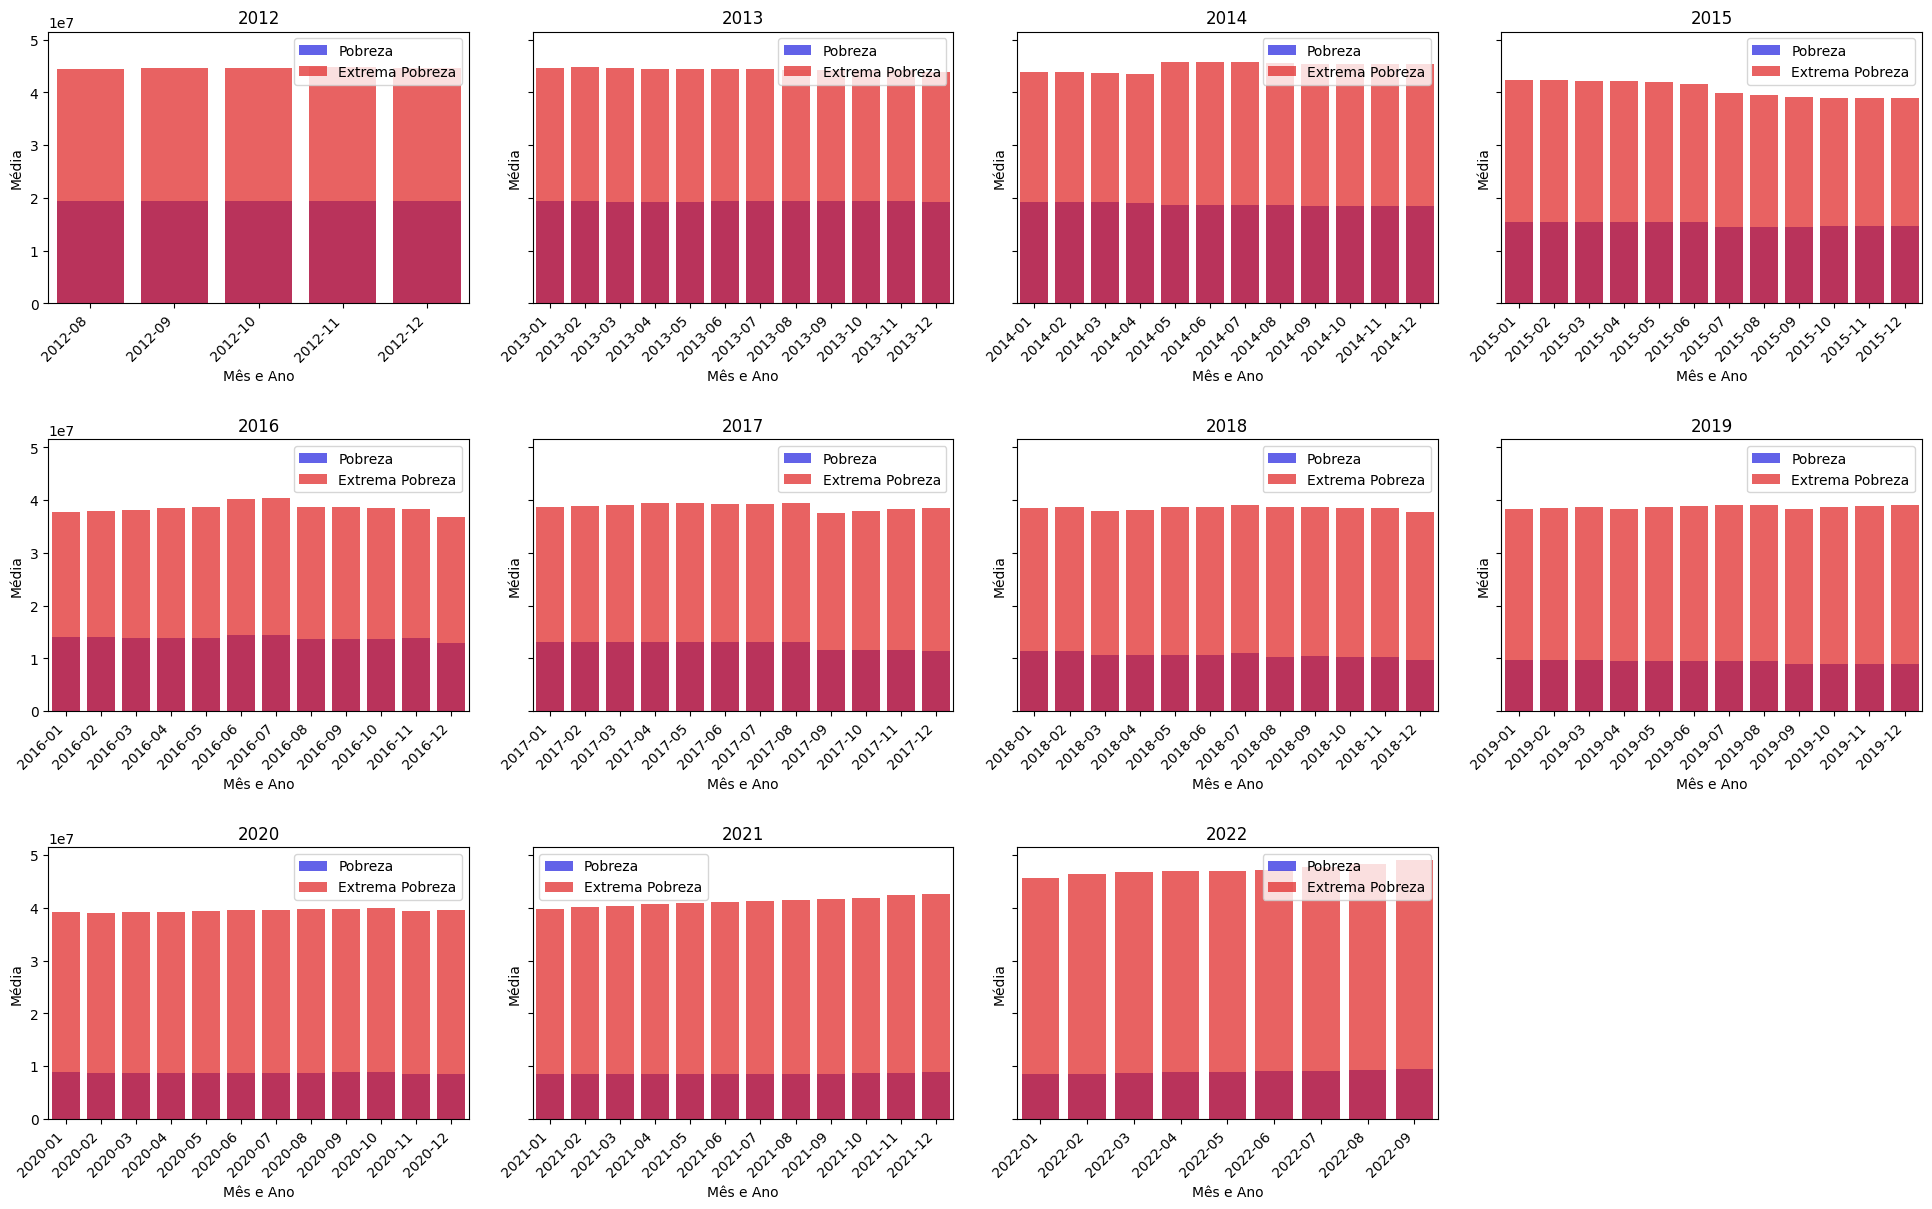

In [53]:
# Obtém uma lista de anos
anos = dataset['referencia'].dt.year.unique()

# Define o número de colunas e linhas para subplots
num_colunas = 4
num_linhas = (len(anos) + num_colunas - 1) // num_colunas

# Ajusta o tamanho da figura
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(20, 4 * num_linhas), sharey=True)

# Ajusta o layout para evitar sobreposição
plt.tight_layout(pad=3.0)

# Itera sobre os anos e cria um gráfico para cada ano
for i, ano in enumerate(anos):
    dados_ano = dataset[dataset['referencia'].dt.year == ano]

    # Calcula o índice do subplot
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plota o gráfico no subplot
    ax = axs[linha, coluna]
    sns.barplot(x='ano_mes', y='pobreza', data=dados_ano, ax=ax, label='Pobreza', color='blue', alpha=0.7)
    sns.barplot(x='ano_mes', y='ext_pobreza', data=dados_ano, ax=ax, label='Extrema Pobreza', color='red', alpha=0.7)

    ax.set_title(f'{ano}')
    ax.set_xlabel('Mês e Ano')
    ax.set_ylabel('Média')
    ax.legend()

    # Rotaciona os rótulos do eixo x e ajusta o espaçamento
    ax.tick_params(axis='x', rotation=45, labelrotation=45)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Remove subplots vazios
for i in range(len(anos), num_linhas * num_colunas):
    fig.delaxes(axs.flatten()[i])

# Ajusta o espaçamento entre os subplots
plt.subplots_adjust(hspace=0.5)

# Ajusta a largura da célula para evitar barras de rolagem
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Exibe o gráfico
plt.show()

Na análise a seguir iremos analisar os dados de forma anual em um gráfico. Assim conseguiremos ter uma noção melhor de alteração no gráfico ao longo prazo.

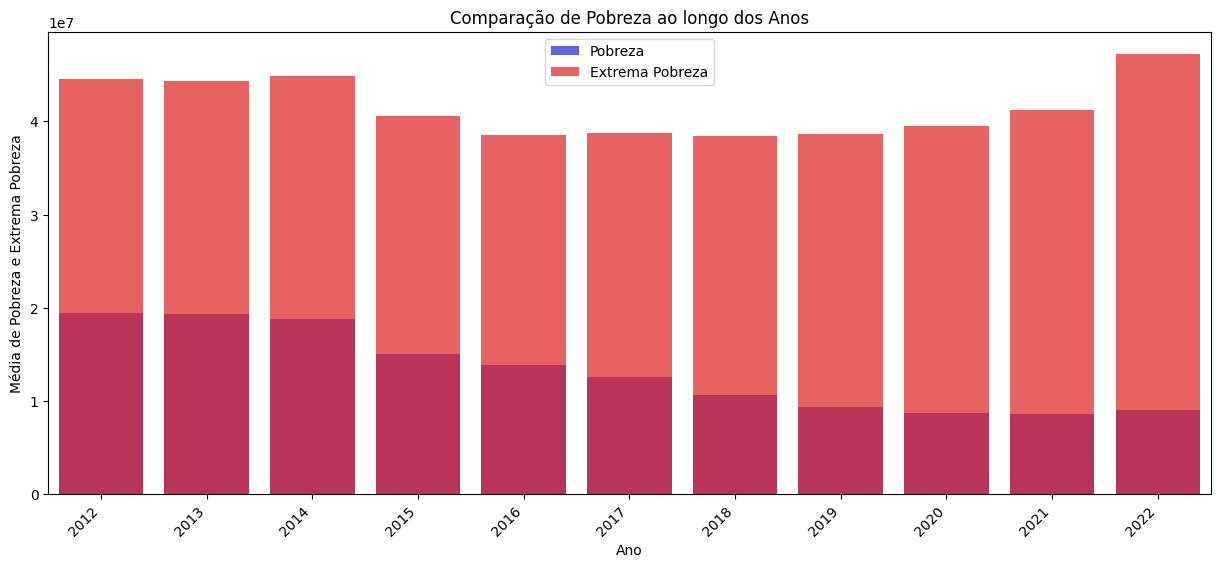

In [54]:

# Converte a coluna 'referencia' para o tipo de dado de data
dataset['referencia'] = pd.to_datetime(dataset['referencia'])

# Agrupa os dados por ano e calcula as médias
dados_por_ano = dataset.groupby(dataset['referencia'].dt.year).mean().reset_index()

# Ajusta o tamanho da figura
plt.figure(figsize=(15, 6))

# Plota o gráfico
sns.barplot(x='referencia', y='pobreza', data=dados_por_ano, color='blue', alpha= 0.7, label='Pobreza')
sns.barplot(x='referencia', y='ext_pobreza', data=dados_por_ano, color='red', alpha= 0.7, label='Extrema Pobreza')

plt.title('Comparação de Pobreza ao longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Média de Pobreza e Extrema Pobreza')

# Rotaciona os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

plt.legend()

# Exibe o gráfico
plt.show()


No gráfico de barrar acima, conseguimos constatar que nos anos de 2015 até 2019 a ambas as taxas vinham decaindo, demonstrando uma menor quantidade de pessoas em situação de vulnerabilidade, mas de 220 adiante vemos um crescimento muito alto de pessoas em extrema pobreza, um dos maiores influenciadores dessa alteração foi a pandemia do Covid-19, o numero de pessoas em situação de pobreza não alterou muito mas o de pessoas em extrema pobreza teve uma crescente bem considerável.

Provavelmente, pessoas em situação de pobreza acabaram indo para situação de extrema pobreza por conta do periodo complicado que o país passou, e, além disso outras pessoas com certeza ficaram em situação de pobreza nesse periodo, por isso só vemos aumento de ambas as colunas no gráfico acima.

####Tendência Temporal de Pobreza

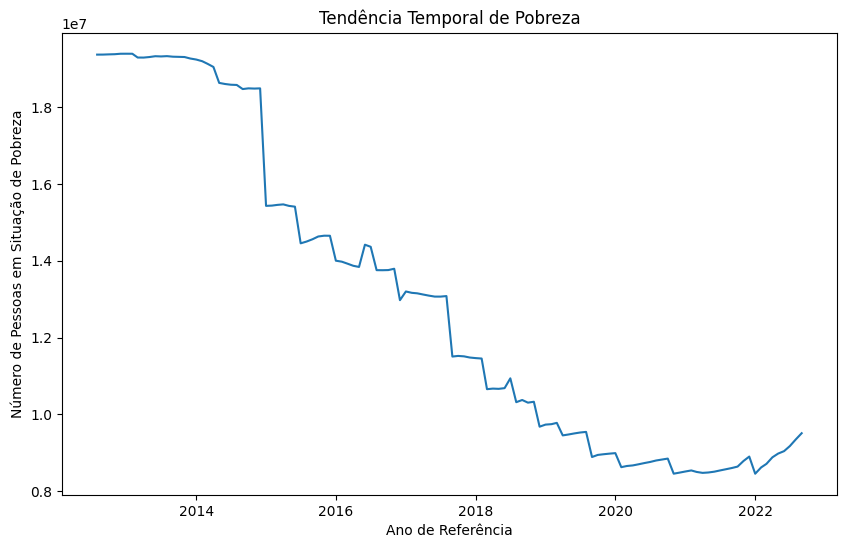

In [55]:
# Cria o gráfico de linhas
plt.figure(figsize=(10, 6))
sns.lineplot(x='referencia', y='pobreza', data=dataset)

plt.title('Tendência Temporal de Pobreza')
plt.xlabel('Ano de Referência')
plt.ylabel('Número de Pessoas em Situação de Pobreza')
plt.show()


Acima conseguimos visualizar que a quantidade de pessoas em situação de pobreza estava em declinio até o periodo de 2020 em que se manteve estável de certa forma até 2022 aonde voltou a ter um aumento.

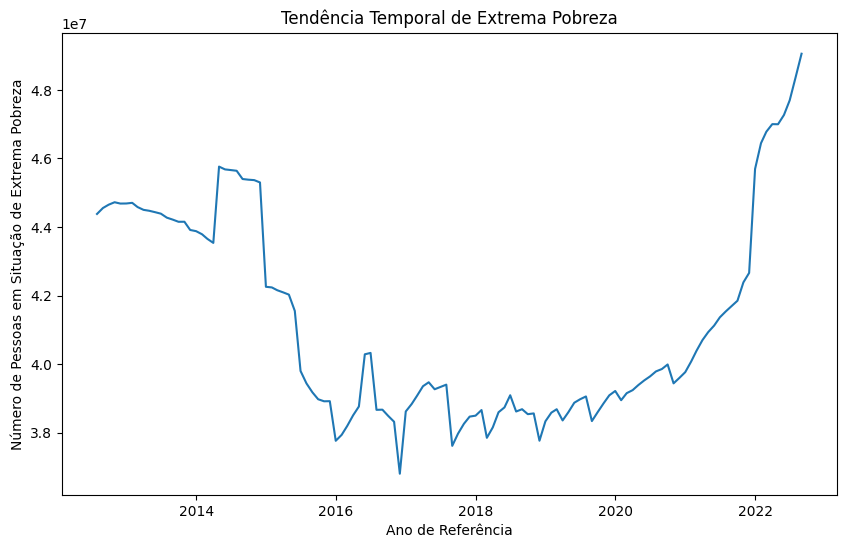

In [56]:
# Cria o gráfico de linhas
plt.figure(figsize=(10, 6))
sns.lineplot(x='referencia', y='ext_pobreza', data=dataset)

plt.title('Tendência Temporal de Extrema Pobreza')
plt.xlabel('Ano de Referência')
plt.ylabel('Número de Pessoas em Situação de Extrema Pobreza')
plt.show()


Vemos aqui que tivemos um salto enorme no número de pessoas em situação de pobreza durante o periodo da pandemia.

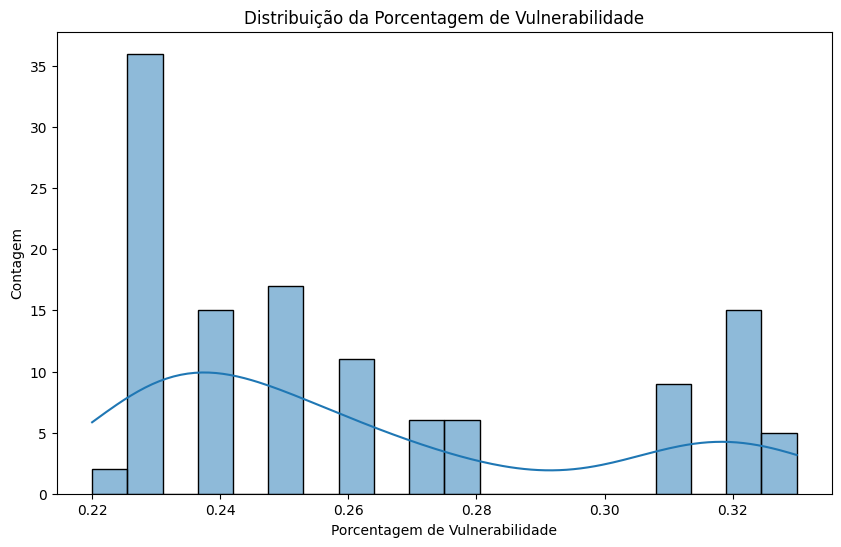

In [57]:
# Cria o histograma
plt.figure(figsize=(10, 6))
sns.histplot(dataset['por_vulnerabilidade'], bins=20, kde=True)

plt.title('Distribuição da Porcentagem de Vulnerabilidade')
plt.xlabel('Porcentagem de Vulnerabilidade')
plt.ylabel('Contagem')
plt.show()


### 3.3. Visualizações Multimodais

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que parece haver alguma estrutura na ordem dos atributos. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos

Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A **covariância** representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:
* Próximo de -1 : há uma correlação negativa entre as variáveis,
* Próximo de +1: há uma correlação positiva entre as variáveis.
* 0: não há correlação entre as variáveis.

<i>OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.</i>


O código a seguir exibe a matriz de correlação.

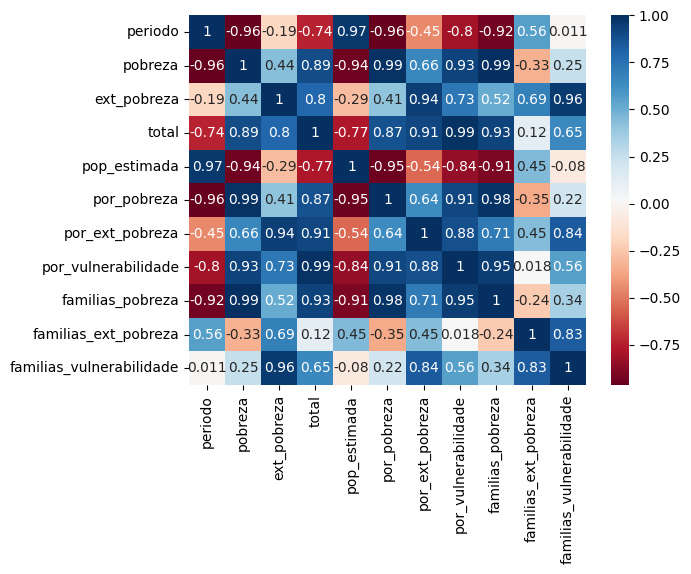

In [58]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

Por sua vez, o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

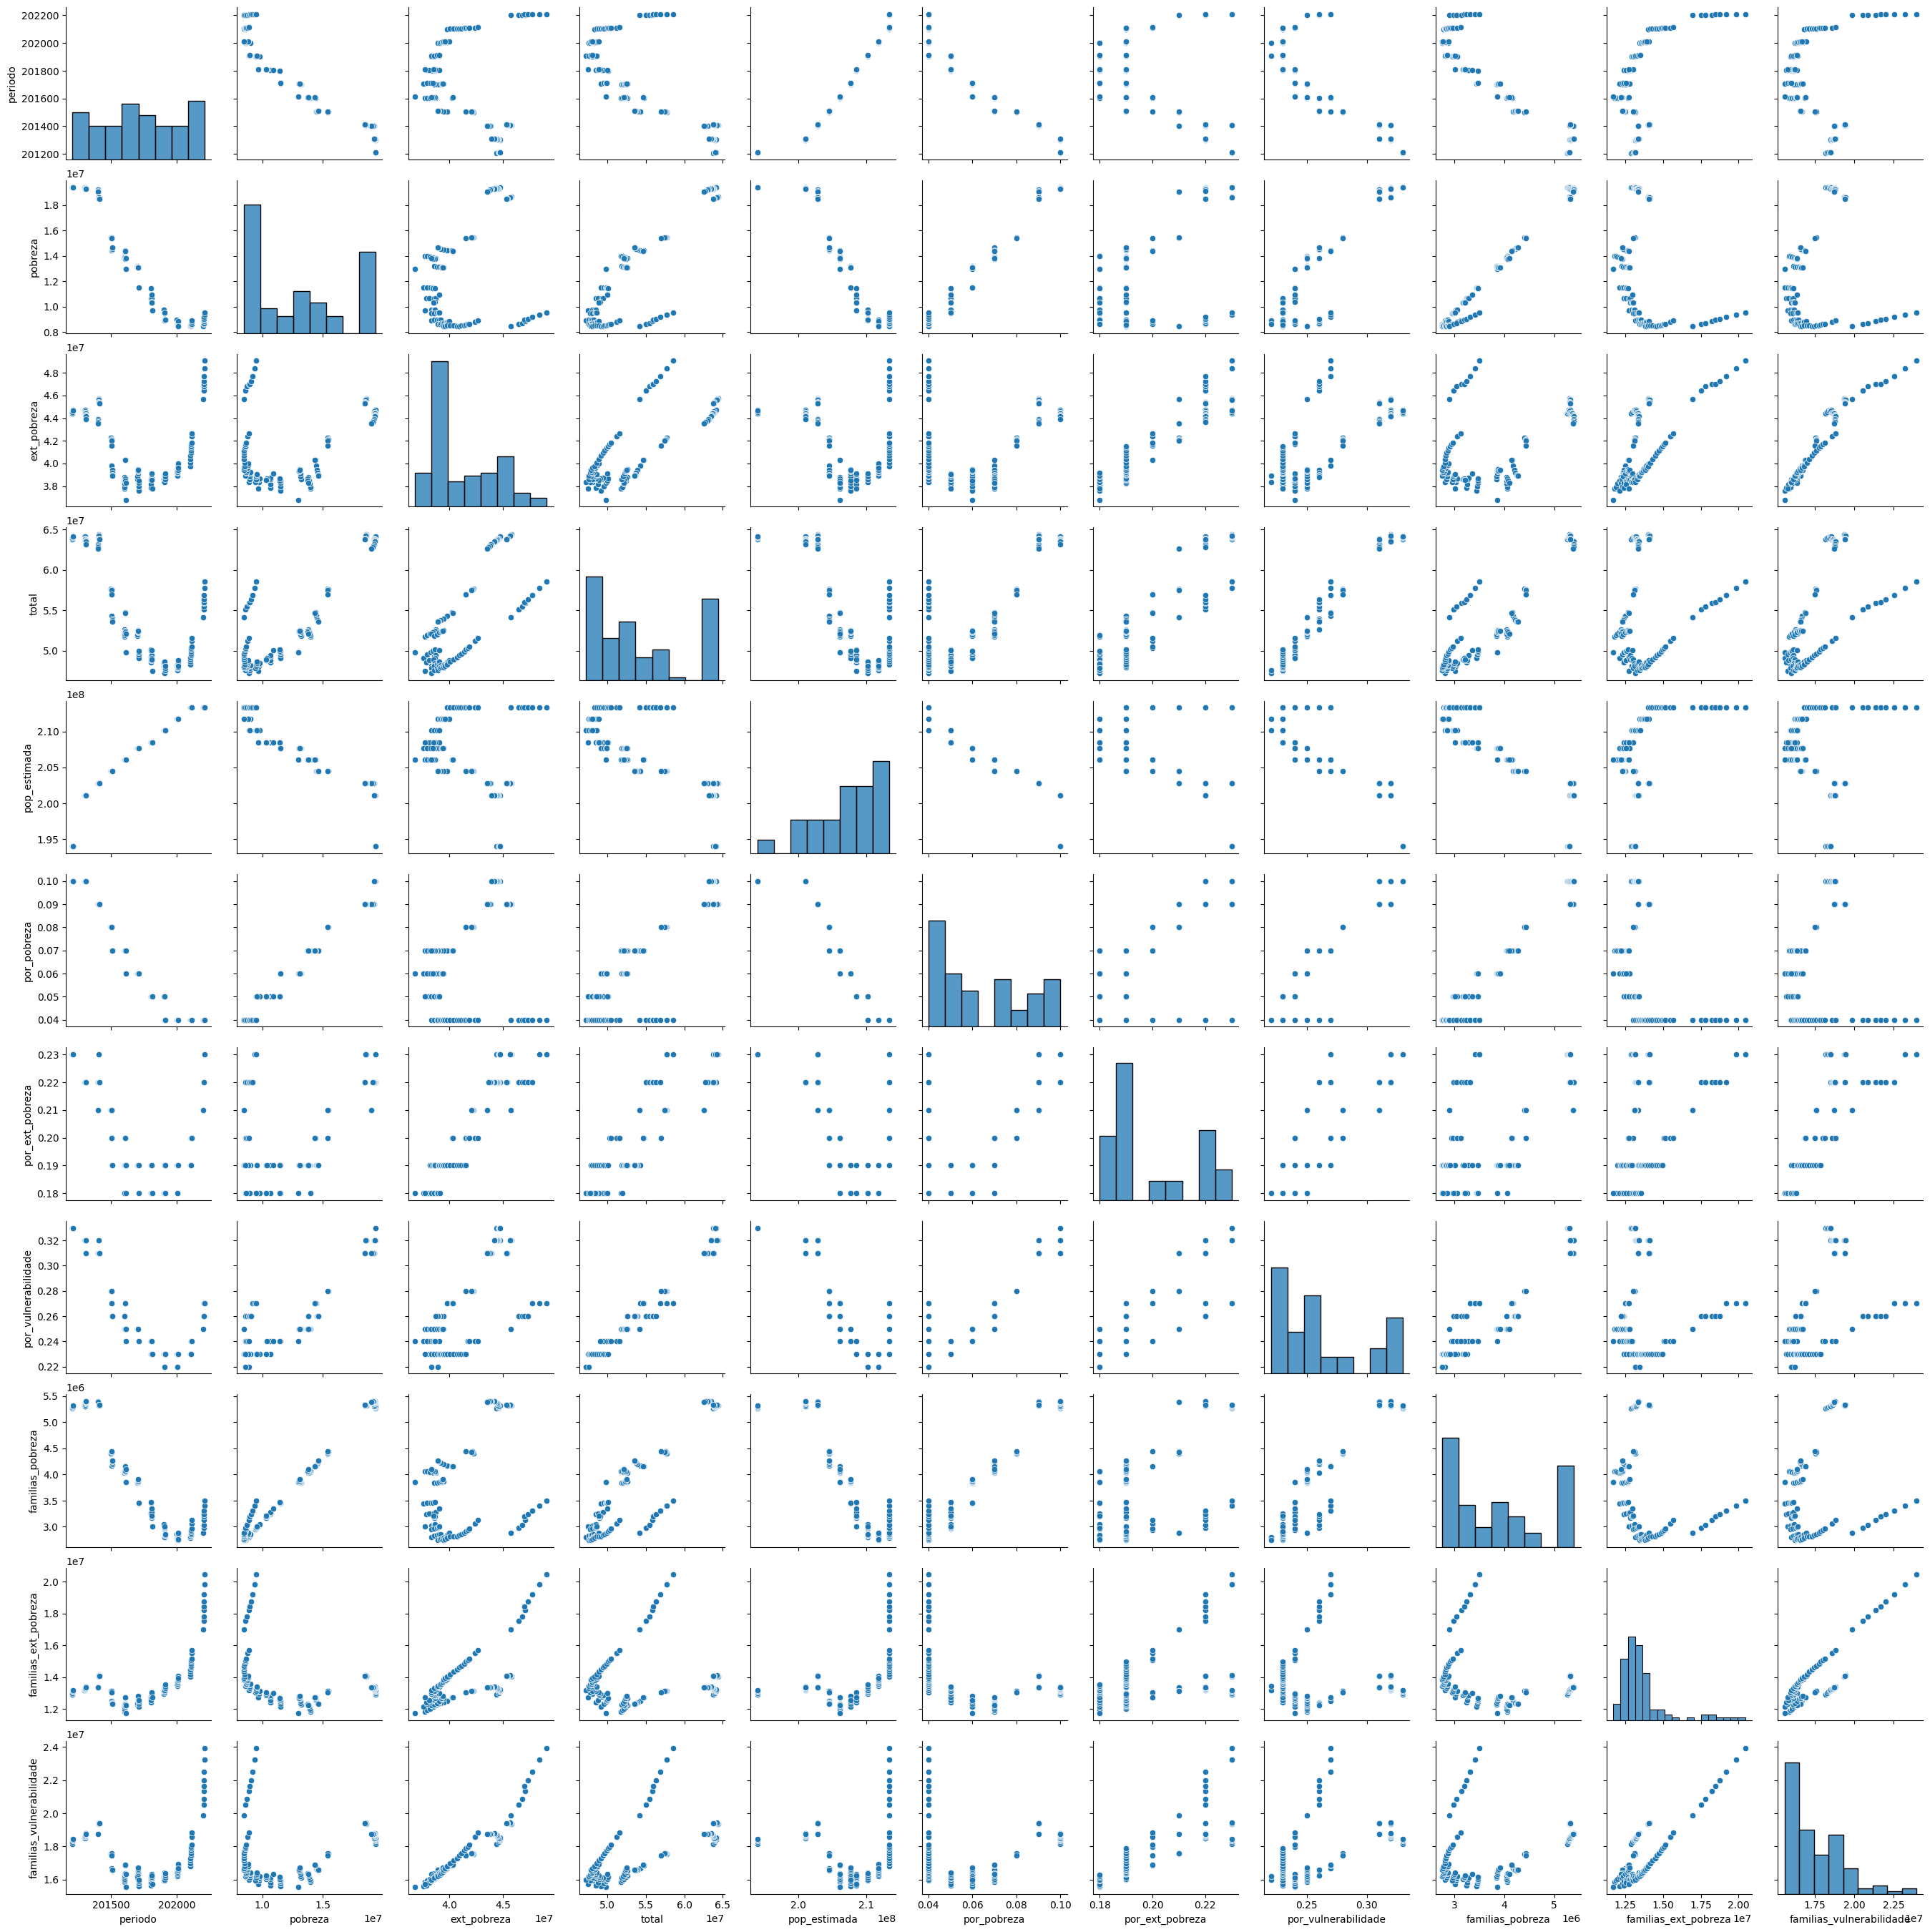

In [59]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(dataset)

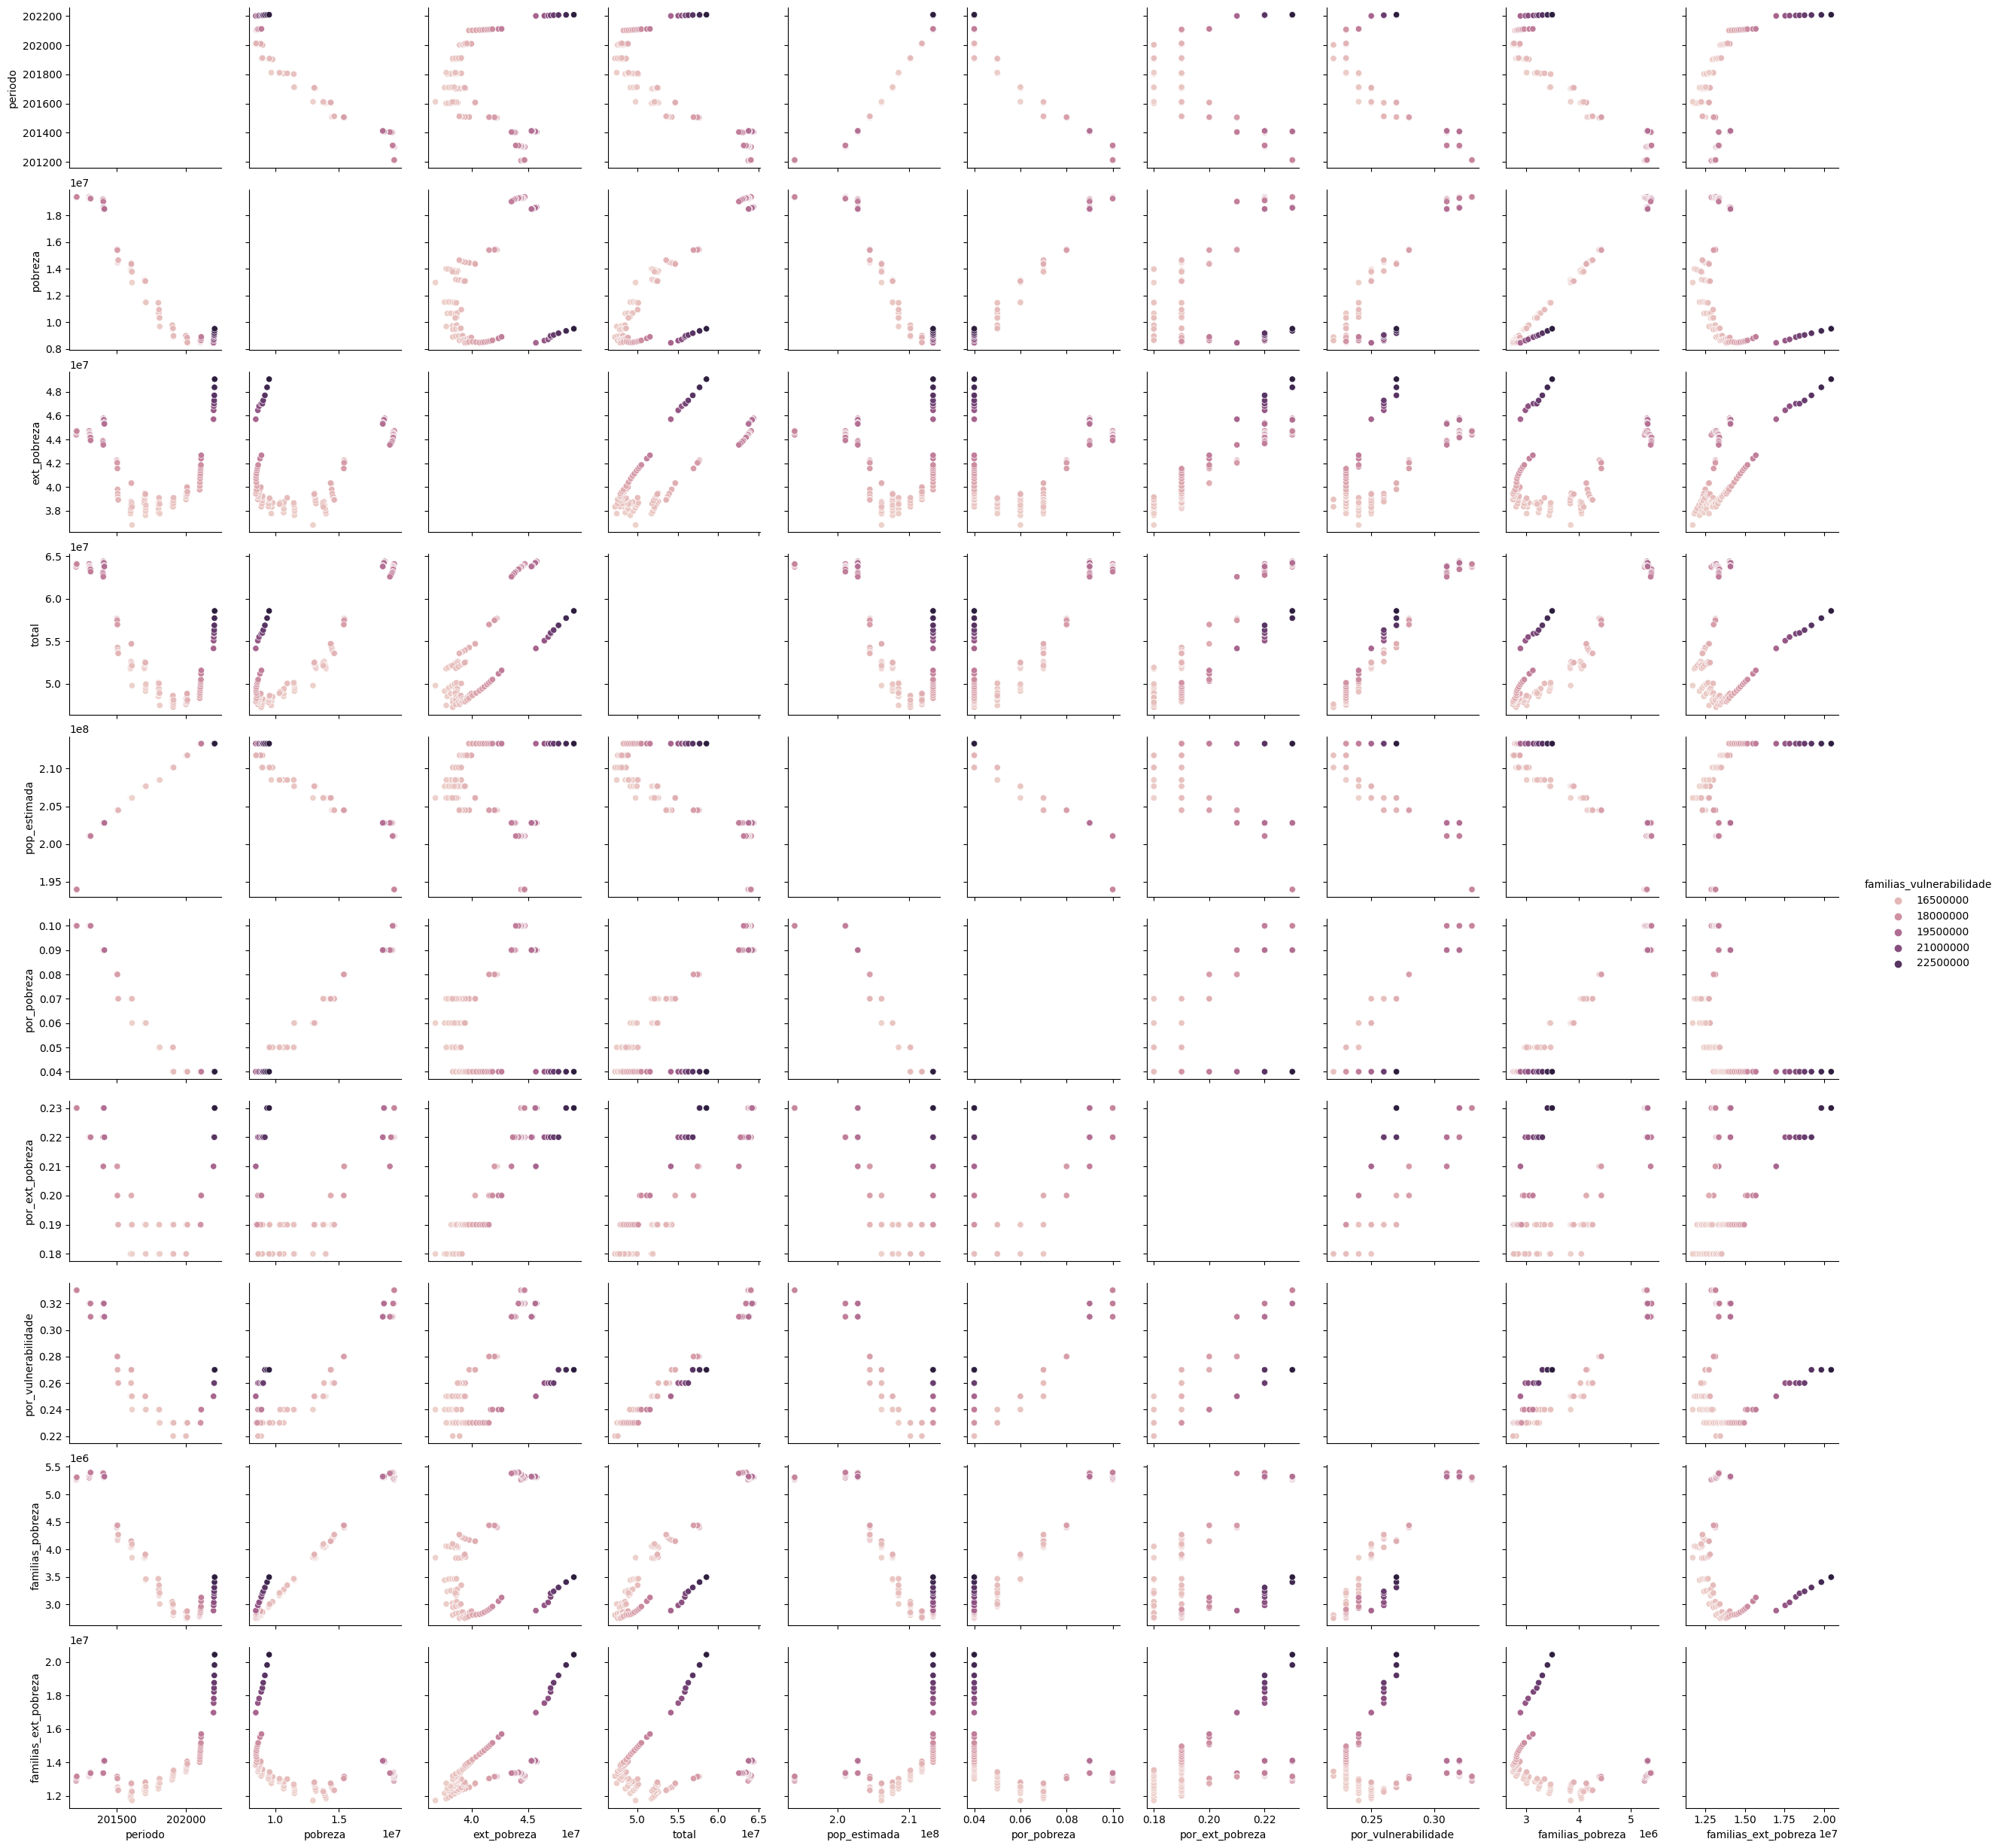

In [60]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(dataset, hue = "familias_vulnerabilidade", height = 2.5);

## 4. Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

Sabemos que o datset Diabetes não tem missings aparentes, mas valores "0" que parecem ser missings. Vamos então fazer este tratamento e criar uma nova visão do nosso dataset.

In [61]:
# verificando nulls no dataset
dataset.isnull().sum()

referencia                  0
periodo                     0
pobreza                     0
ext_pobreza                 0
total                       0
pop_estimada                0
por_pobreza                 0
por_ext_pobreza             0
por_vulnerabilidade         0
familias_pobreza            0
familias_ext_pobreza        0
familias_vulnerabilidade    0
ano_mes                     0
dtype: int64

### 4.1. Normalização e Padronização


Aqui veremos exemplos de normalização e padronização realizadas no dataset de indice de pobreza.

In [62]:
# Realizando a padronização das colunas 'pobreza' e 'ext_pobreza' como exemplo.
scaler_pad = StandardScaler()

# Selecionando apenas as colunas numéricas do DataFrame
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset_numeric = dataset[numeric_columns]

# Copiando o DataFrame e aplicando a padronização
dataset_padronized = scaler_pad.fit_transform(dataset_numeric)

# Convertendo a matriz NumPy de volta para um DataFrame
dataset_padronized = pd.DataFrame(dataset_padronized, columns=numeric_columns)

# Excluindo a coluna 'periodo' do DataFrame
dataset_padronized = dataset_padronized.drop('periodo', axis=1)

In [63]:
# Utilizaremos a função head() para visualizarmos as 5 primeiras linhas do dataset sem a padronização
dataset.head()

,referencia,periodo,pobreza,ext_pobreza,total,pop_estimada,por_pobreza,por_ext_pobreza,por_vulnerabilidade,familias_pobreza,familias_ext_pobreza,familias_vulnerabilidade,ano_mes
0,2012-08-01,201208,19370363,44381455,63751818,193976530,0.100,0.230,0.330,5265743,12897221,18162964,2012-08
1,2012-09-01,201209,19371279,44554715,63925994,193976530,0.100,0.230,0.330,5278170,13006755,18284925,2012-09
2,2012-10-01,201210,19376665,44652093,64028758,193976530,0.100,0.230,0.330,5288902,13076366,18365268,2012-10
3,2012-11-01,201211,19381040,44723215,64104255,193976530,0.100,0.230,0.330,5298295,13131359,18429654,2012-11
4,2012-12-01,201212,19392882,44684759,64077641,193976530,0.100,0.230,0.330,5311337,13161099,18472436,2012-12


In [64]:
# Agora veremos as 5 primeiras linhas do dataset alterado para vermos a diferença que a padronização trouxe as colunas do dataset, excluindo as colunas 'referencia' e 'periodo'.
dataset_padronized.head()

,pobreza,ext_pobreza,total,pop_estimada,por_pobreza,por_ext_pobreza,por_vulnerabilidade,familias_pobreza,familias_ext_pobreza,familias_vulnerabilidade
0,1.594,1.049,1.598,-2.751,1.691,1.804,1.959,1.467,-0.454,0.399
1,1.594,1.107,1.627,-2.751,1.691,1.804,1.959,1.480,-0.386,0.472
2,1.595,1.139,1.644,-2.751,1.691,1.804,1.959,1.491,-0.343,0.520
3,1.596,1.163,1.657,-2.751,1.691,1.804,1.959,1.501,-0.309,0.559
4,1.599,1.150,1.652,-2.751,1.691,1.804,1.959,1.515,-0.291,0.584


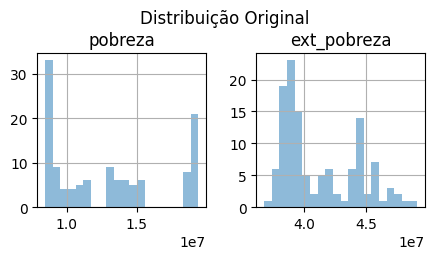

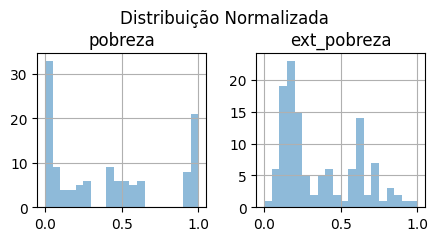

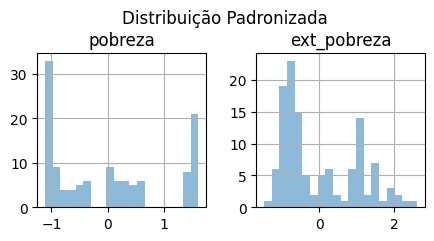

In [65]:
# Antes da normalização/padronização
dataset[['pobreza', 'ext_pobreza']].hist(figsize=(5, 2), bins=20, alpha=0.5)
# Adicione um título adicional usando suptitle
plt.suptitle('Distribuição Original', y=1.1)
#plt.title('Distribuição Original')
plt.show()

# Depois da normalização
dataset_normalized = dataset.copy()
scaler_norm = MinMaxScaler()
dataset_normalized[['pobreza', 'ext_pobreza']] = scaler_norm.fit_transform(dataset_normalized[['pobreza', 'ext_pobreza']])
dataset_normalized[['pobreza', 'ext_pobreza']].hist(figsize=(5, 2), bins=20, alpha=0.5)
plt.suptitle('Distribuição Normalizada', y=1.1)
plt.show()

# Depois da padronização
dataset_padronized = dataset.copy()
scaler_pad = StandardScaler()
dataset_padronized[['pobreza', 'ext_pobreza']] = scaler_pad.fit_transform(dataset_padronized[['pobreza', 'ext_pobreza']])
dataset_padronized[['pobreza', 'ext_pobreza']].hist(figsize=(5, 2), bins=20, alpha=0.5)
plt.suptitle('Distribuição Padronizada', y=1.1)
plt.show()


Acima temos os gráficos das colunas 'pobreza' e 'ext_pobreza' em sua forma original, normalizada e também padronizada, facilitando assim o entendimento da alteração na escala causada por essas alterações. No caso do dataset utilizado neste projeto, a Normalização é a melhor maneira de facilitar a leitura dos dados.

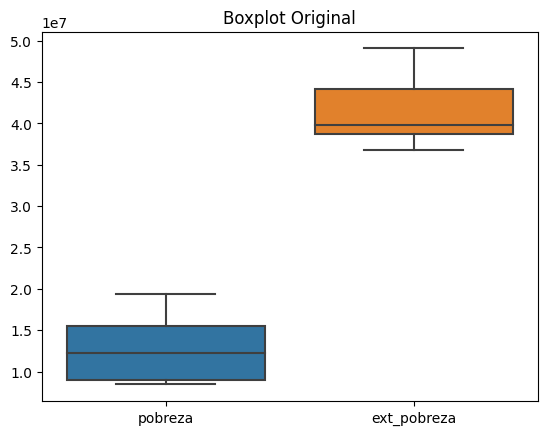

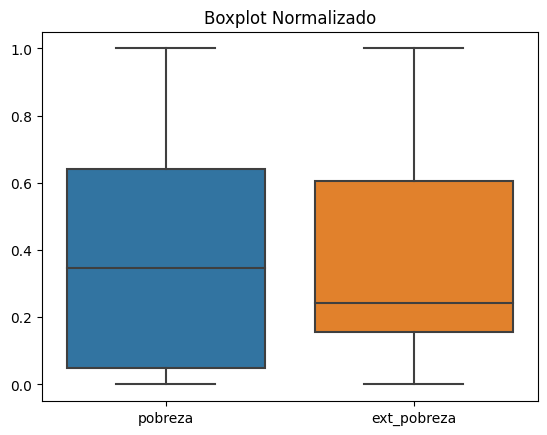

In [66]:
# Antes da normalização/padronização
sns.boxplot(data=dataset[['pobreza', 'ext_pobreza']])
plt.title('Boxplot Original')
plt.show()

# Depois da normalização/padronização
sns.boxplot(data=dataset_normalized[['pobreza', 'ext_pobreza']])
plt.title('Boxplot Normalizado')
plt.show()


Vemos acima que com a utilização da normalização nós conseguimos melhorar a visualização e entendimento dos dados do dataset por conta da proporção dos dados se manter igual, o que muda é a escala em que os dados são demonstrados.

#### Estatistica Descritiva

In [67]:
# Antes da normalização/padronização
print("Estatísticas Descritivas Original:")
print(dataset[['pobreza', 'ext_pobreza']].describe())

# Depois da normalização/padronização
print("\nEstatísticas Descritivas Normalizado/Padronizado:")
print(dataset_normalized[['pobreza', 'ext_pobreza']].describe())


Estatísticas Descritivas Original:
           pobreza  ext_pobreza
count      122.000      122.000
mean  12948012.131 41231462.549
std    4046276.465  3015699.307
min    8454642.000 36803455.000
25%    8978067.500 38698620.250
50%   12248774.500 39777429.500
75%   15451770.250 44200667.500
max   19393635.000 49055941.000

Estatísticas Descritivas Normalizado/Padronizado:
       pobreza  ext_pobreza
count  122.000      122.000
mean     0.411        0.361
std      0.370        0.246
min      0.000        0.000
25%      0.048        0.155
50%      0.347        0.243
75%      0.640        0.604
max      1.000        1.000


In [68]:
# Definir a opção de formato para exibir números float sem notação científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Exibir estatísticas descritivas novamente
print("Estatísticas Descritivas Original:")
print(dataset.describe())

# Restaurar a opção padrão se necessário
# pd.reset_option('display.float_format')


Estatísticas Descritivas Original:
         periodo      pobreza  ext_pobreza        total  pop_estimada  \
count    122.000      122.000      122.000      122.000       122.000   
mean  201722.926 12948012.131 41231462.549 54179474.680 207211210.762   
std      296.502  4046276.465  3015699.307  6015011.201   4830404.929   
min   201208.000  8454642.000 36803455.000 47229326.000 193976530.000   
25%   201502.250  8978067.500 38698620.250 48892009.000 204482867.000   
50%   201708.500 12248774.500 39777429.500 52292939.500 207660929.000   
75%   202002.750 15451770.250 44200667.500 57708982.000 211755692.000   
max   202209.000 19393635.000 49055941.000 64396550.000 213317639.000   

       por_pobreza  por_ext_pobreza  por_vulnerabilidade  familias_pobreza  \
count      122.000          122.000              122.000           122.000   
mean         0.063            0.200                0.262       3865710.615   
std          0.022            0.017                0.035        958263.03

### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split.

fazer a separação do dataset em treino e teste

In [69]:

# Definir as features (X) e o target (y)
X = dataset.drop(['referencia', 'periodo', 'pobreza', 'ext_pobreza'], axis=1)
y = dataset['pobreza']

# Separar em conjunto de treino e teste ( 80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir o número de amostras em cada conjunto
print(f'Número de amostras no conjunto de treino: {len(X_train)}')
print(f'Número de amostras no conjunto de teste: {len(X_test)}')


Número de amostras no conjunto de treino: 97
Número de amostras no conjunto de teste: 25


## Conclusão

Neste MVP foi possível verificar que tivemos uma relação entre o aumento da pobreza e da extrema pobreza no periodo da pandemia. Vimos claramente a alteração nos gráficos e valores no periodo entre 2020 até o final de 2022.

Neste projeto eu poderia ter realizado um maior número de análises, como a média de pessoa por familia em situação de pobreza e extrema pobreza, reproduzir com outras colunas gráficos e análises que foram feitas para as colunas de pobreza e extrema pobreza mas achei redundante reutilizar as mesmas técnicas repetidas vezes para mostrar resultados similares. Já que se trata de um MPV, tentei manter o mais enxuto possivel, achei interessante focar em demonstrar técnicas diferentes de análise como o foco principal.